In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.datasets import fetch_lfw_people
from skimage.transform import resize
from skimage.feature import hog

In [2]:
# Fetch LFW dataset with minimum faces per person = 40
lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=0.4)

In [3]:
print(f"Actual shape of the image: {lfw_people.images.shape[1:]}")

Actual shape of the image: (50, 37)


In [4]:
# Storing the data
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
print(X.shape)

(1777, 1850)


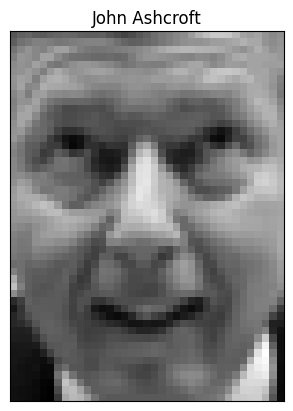

In [5]:
# Example Image
img = X[100].reshape((lfw_people.images.shape[1],lfw_people.images.shape[2]))

plt.title(target_names[y[100]], size=12)
plt.xticks(())
plt.yticks(())
plt.imshow(img,  cmap=plt.cm.gray)

# LBP from scratch

In [6]:
def get_pixel(img, center, x, y): 

	new_value = 0
	try: 
		# If local neighbourhood pixel value is greater than or equal to center pixel values then set it to 1 
		if img[x][y] >= center: 
			new_value = 1

	except: 
		# Exception is required when neighbourhood value of a center pixel value is null i.e. values present at boundaries. 
		pass

	return new_value 

# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y): 

	center = img[x][y] 
	val_ar = [] 
	
	# top_left 
	val_ar.append(get_pixel(img, center, x-1, y-1)) 
	# top 
	val_ar.append(get_pixel(img, center, x-1, y)) 
	# top_right 
	val_ar.append(get_pixel(img, center, x-1, y+1)) 
	# right 
	val_ar.append(get_pixel(img, center, x, y+1)) 
	# bottom_right 
	val_ar.append(get_pixel(img, center, x+1, y+1)) 
	# bottom 
	val_ar.append(get_pixel(img, center, x+1, y)) 
	# bottom_left 
	val_ar.append(get_pixel(img, center, x+1, y-1)) 
	# left 
	val_ar.append(get_pixel(img, center, x, y-1)) 
	
	# Now, we need to convert binary values to decimal 
	power_val = [1, 2, 4, 8, 16, 32, 64, 128] 

	val = 0
	
	for i in range(len(val_ar)): 
		val += val_ar[i] * power_val[i] 
		
	return val 

# Implementing and Visualising LBP

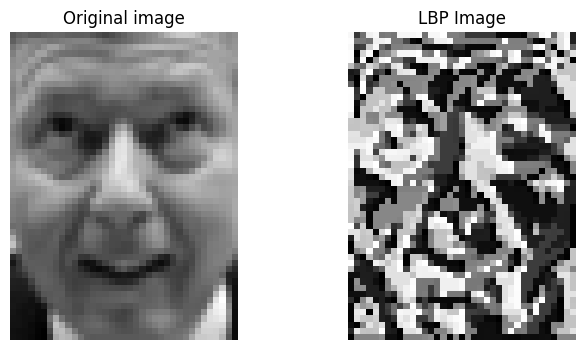

In [7]:
height, width = img.shape 

# We use this new img_lbp as extracted features
img_lbp = np.zeros((height, width), np.uint8) 

for i in range(0, height): 
	for j in range(0, width): 
		img_lbp[i, j] = lbp_calculated_pixel(img, i, j) 

# Visualising LBF image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Original image')

ax2.axis('off')
ax2.imshow(img_lbp, cmap=plt.cm.gray)
ax2.set_title('LBP Image')
plt.show()

In [8]:
print(f"Final shape of the features obtained: {img_lbp.shape}")

Final shape of the features obtained: (50, 37)
